# 2023年度 実世界情報実験1 画像処理テーマ


## 第２課題ファイル

このノートではOpenCVのさまざまな画像処理関数について学ぶ。

## 補足
高度な画像処理を行う場合、画像の解像度が高いと
実行に非常に長い時間や大量のメモリを要する場合がある。
また、Google Colaboratory上に表示されている画像は
ipynbファイルにも含まれているため、高解像度の画像は
提出時のipynbファイルが大きくなる原因にもなる。
manaba+Rでファイルを提出する際にはサイズの上限（20MB）があり
これを超えるサイズのファイルは提出できない。

必要に応じて縮小した画像を用いて実験を行うとよい。
OpenCVの `cv2.resize()` 関数を用いると簡単に縮小することができる。
[OpenCV-Pythonチュートリアル » OpenCVを使った画像処理 » 画像の幾何変換 » スケーリング(拡大・縮小)](http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html#id4)
の項を参考にすればよい。

特に自分で撮影した画像を用いる場合、近年のデバイスは非常に
高解像度な画像を生成することがあるので注意すること。

また、やむを得ずファイルサイズが上限を超えてしまい
提出できない場合は教員に申し出て相談すること。

## おさらい

### 課題 2−1
横軸座標x、縦軸座標yの画素値$I(x,y)$が
$I(x,y) = \min(x+y,255)$になるような画像を
つくって表示・保存せよ。

プログラムコードだけでなく、生成結果の
画像も画像ファイルとして提出すること。
結果のファイル名は `leson2-1.png` とすること。

> **ヒント**
>
> 高さheight、幅widthの画像変数を生成する場合は、numpy(OpenCVが利用している数値演算モジュール)の関数を使う。
```
import numpy as np
image = np.zeros((height,width,3), np.uint8) # カラー画像(3ch)の場合
image = np.zeros((height, width, 3), np.uint8)
image = np.zeros((height,width), np.uint8) # 濃淡画像(1ch)の場合
```
上のやり方で作ったimageは全画素の画素値が0の黒い画像になる。
>
> 画像 `image` の縦 `i` , 横 `j` の画素に値 `val` を
セットするときは、`image.itemset((i,j), val)` と書く方法もある。非常に多くの画素値を繰り返し設定する際にはこちらの方が高速な場合がある。 [参考: numpy.ndarray.itemset — NumPy v1.18 Manual](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.itemset.html#numpy.ndarray.itemset)
>
> pyplotの `imshow()` は白黒のコントラストを自動調整するので、正確に表示するには、`plt.imshow(img,cmap="gray",vmin=0,vmax=255)` と書く必要がある。

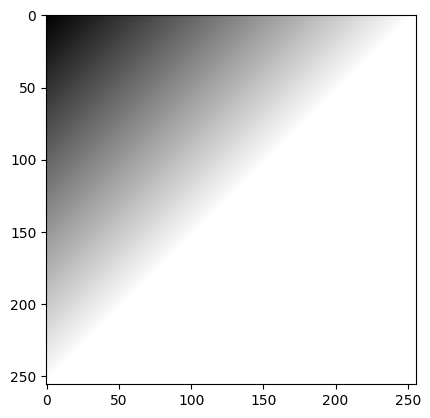

In [120]:
# 課題 2-1 code解答欄
import cv2
import numpy as np
import matplotlib.pyplot as plt
width, height = 256, 256    # Pythonの多重代入機能
image = np.zeros((height, width), np.uint8)
#
# imageの内容を設定する処理を補う
for i in range(256):
    for j in range(256):
        image.itemset((i,j),min((i+j),255))


cv2.imwrite("lesson2-1.png", image)
plt.imshow(image, cmap="gray", vmin=0, vmax=255)


## 算術演算
- [OpenCV-Pythonチュートリアル » 基本的な処理 » 画像の算術演算](http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_core/py_image_arithmetics/py_image_arithmetics.html)

Python用のOpenCVでは画像は
[数値計算ライブラリ NumPy](https://numpy.org/)
の **配列** として表現されている。
これは数値を多次元に並べたものであり、
行列のように画素ごとの足し算や引き算などの
演算を実行できる。
これを応用すると２つの画像のブレンディングを実行できる。



### 課題 2-2
インターネット上からダウンロードした画像など
配布しているzipファイル内の画像とは異なる画像を2枚用意し、
その2枚の画像をブレンディング（重ね合わせ）して表示せよ。
2枚のブレンディング前の画像、ブレンディング後の画像と並べて表示すること。
ブレンディング方法は自由であるが使用した2枚の画像の両方の模様が見える方法とすること。

プログラムコードだけでなく、元となった2つの画像と生成結果の画像も画像ファイルとして提出すること。
元画像のファイル名は `lesson2-2-input-1.png`, `lesson2-2-input-2.png`
（JPEGファイルであれば `lesson2-2-input-1.jpg` など）とし、
結果のファイル名は `lesson2-2.png` とすること。

True

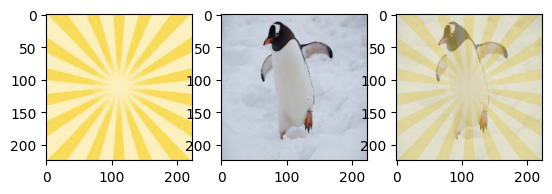

In [122]:
# 課題 2-2 code解答欄
import cv2
import numpy as np
import matplotlib.pyplot as plt

img=cv2.imread("lesson2-2-input-1.jpg")
img1=cv2.imread("lesson2-2-input-2.jpg")

img=cv2.resize(img,(224,224))
img1=cv2.resize(img1,(224,224))

dst = cv2.addWeighted(img,0.5,img1,0.5,0)

# 画像を並べて表示する方法のヒント
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
cv2.imwrite("lesson2-2.png", dst)


### 課題 2-3
配布しているzipファイル内の画像とは異なる画像を2枚用意し、
`cv2.addWeighted()` 関数を使って
2枚の画像A,Bのうちの片方の画像Aから、もう一方の画像Bに滑らかに遷移する画像群（少なくとも5枚以上）を生成せよ。

プログラムコードだけでなく、元となった画像と生成結果の画像（複数）も画像ファイルとして提出すること。
元画像のファイル名は `lesson2-3-input-1.png`, `lesson2-3-input-2.png`, ...
（JPEGファイルであれば `lesson2-3-input-1.jpg` など）とし、
結果のファイル名は `lesson2-3-1.png`, `lesson2-3-2.png`,
... とすること。

True

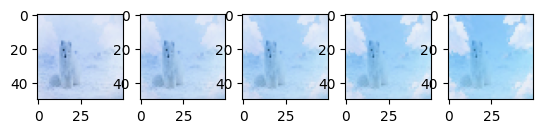

In [123]:
# 課題 2-3 code解答欄
import cv2
import numpy as np
import matplotlib.pyplot as plt

img=cv2.imread("lesson2-3-input-1.jpg")
img1=cv2.imread("lesson2-3-input-2.jpg")

img=cv2.resize(img,(50,50))
img1=cv2.resize(img1,(50,50))

dst1 = cv2.addWeighted(img,0.1,img1,0.9,0)
dst2 = cv2.addWeighted(img,0.2,img1,0.8,0)
dst3 = cv2.addWeighted(img,0.3,img1,0.7,0)
dst4 = cv2.addWeighted(img,0.4,img1,0.6,0)
dst5 = cv2.addWeighted(img,0.5,img1,0.5,0)

# 画像を並べて表示する方法のヒント
plt.subplot(1, 5, 1)
plt.imshow(cv2.cvtColor(dst1, cv2.COLOR_BGR2RGB))
plt.subplot(1, 5, 2)
plt.imshow(cv2.cvtColor(dst2, cv2.COLOR_BGR2RGB))
plt.subplot(1, 5, 3)
plt.imshow(cv2.cvtColor(dst3, cv2.COLOR_BGR2RGB))
plt.subplot(1, 5, 4)
plt.imshow(cv2.cvtColor(dst4, cv2.COLOR_BGR2RGB))
plt.subplot(1, 5, 5)
plt.imshow(cv2.cvtColor(dst5, cv2.COLOR_BGR2RGB))

cv2.imwrite("lesson2-3-1.png", dst1)
cv2.imwrite("lesson2-3-2.png", dst2)
cv2.imwrite("lesson2-3-3.png", dst3)
cv2.imwrite("lesson2-3-4.png", dst4)
cv2.imwrite("lesson2-3-5.png", dst5)

### 課題 2-4
課題2-3で生成したような、画像Aから画像Bに滑らかに遷移する画像群を使って画像Aから画像Bに滑らかに遷移する動画ファイルを作成せよ。
但し動画ファイルにはそれぞれ異なる画像が30フレーム以上は
含まれるようにすること。

動画ファイルはOpenCVに含まれる関数 `cv2.videoWriter()` を
使って作成できる。

プログラムコードだけでなく元となった画像と生成結果の動画もファイルとして提出すること。
元画像のファイル名は `lesson2-4-input-1.png`, `lesson2-4-input-2.png`
（JPEGファイルであれば `lesson2-4-input-1.jpg` など）とし、
結果のファイル名は `lesson2-4.avi` とすること。

(参考: [OpenCV-Pythonチュートリアル » OpenCVのGUI機能 » 動画を扱う » 動画を保存する](http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_gui/py_video_display/py_video_display.html#id5) ,
[opencv/samples/cpp/videowriter_basic.cpp](https://github.com/opencv/opencv/blob/master/samples/cpp/videowriter_basic.cpp)
)



In [126]:
# 課題 2-4 code解答欄
import cv2
import numpy as np

img=cv2.imread("lesson2-4-input-1.jpg")
img1=cv2.imread("lesson2-4-input-2.jpg")

img=cv2.resize(img,(100,100))
img1=cv2.resize(img1,(100,100))

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('lesson2-4.avi',fourcc, 30, (100,100))

seq=100
for i in range(seq):
  alpha=i/seq
  beta=1-alpha
  dst = cv2.addWeighted(img,alpha,img1,beta,0)
  out.write(dst)



## 色変換
参考サイト: [OpenCV-Pythonチュートリアル » OpenCVを使った画像処理 » 色空間の変換](http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_colorspaces/py_colorspaces.html)

人の網膜には光に反応する細胞があり、それらには反応する光の波長が異なるいくつかの種類がある。
多くの人はR,G,Bの3種類を持つので、一般のカラー画像は3原色の強さを各画素ごとに持たせている。

しかし、色味の種類（赤、橙、黄色、緑、水色、青、紫など）、色味の強さ、明るさを直観的に表現するにはRGB表現では不十分なことがある。<strong>色空間</strong>とは、色を表す尺度をさまざまな基準で定めたもので、HSV, Lab, Yuv, YIQなど複数存在する。

代表的な色空間としてHSVについて検索して調べてみよ。
WikiPediaの [HSV色空間](https://ja.wikipedia.org/wiki/HSV%E8%89%B2%E7%A9%BA%E9%96%93)
の項も参考になる。

### 課題 2-5
配布しているzipファイル内の画像とは異なる画像を用意し、
各画素についてRGB空間からHSVなど別の色空間に変換をし、
それぞれの成分を濃淡画像として生成した画像を表示せよ。
（例えば画像の各画素のHSV表色系におけるH成分を輝度として生成したグレイスケール画像など）

> **ヒント**
>
> `cv2.imread()` で生成した通常のカラー画像は
R,G,Bの3つのチャンネルを含むが `img[:, :, 0]` のように
することで特定チャンネル（ここでは0番目）のみを取り出した
$ (height) \times (width) $ の配列が得られる。
>
> 関数[`matplotlib.pyplot.imshow() `](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)
はこのような単一チャンネルデータが与えられた場合、
数値の大小を何らかのルールで色に変換したうえで表示する。
変換のルールは `vmin, vmax, cmap` などの引数を使って
制御できる。
>
>例えば下記のようにすると配列内の数値の0を黒に、255を白に
対応させ、0から255の間の数値を値に応じた明るさを持つ
灰色を用いて表示する。
```
plt.imshow(img[:, :, 0], vmin=0, vmax=255, cmap="gray")
```
詳しくは Matplotlib のマニュアルを参照すること。
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html

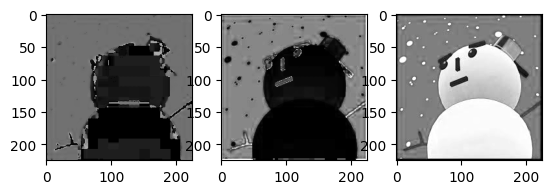

In [26]:
# 課題 2-5 code解答欄
import cv2
import numpy as np
import matplotlib.pyplot as plt

img=cv2.imread("lesson2-5-input.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

plt.subplot(1, 3, 1)
plt.imshow(img[:, :, 0], vmin=0, vmax=255, cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(img[:, :, 1], vmin=0, vmax=255, cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(img[:, :, 2], vmin=0, vmax=255, cmap="gray")


### 課題 2-6
配布しているzipファイル内の画像とは異なる画像を用意し、
[OpenCV-Pythonチュートリアル » OpenCVを使った画像処理 » 色空間の変換 » 物体追跡](http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_colorspaces/py_colorspaces.html#id4) の項を参考にして、
画像の中から特定の色を持つ領域を抽出した画像を
生成し、元の画像と並べて表示せよ。
例では青い領域を取り出しているが、別の色を指定して、実際に抽出せよ。

複数の画像を用意し
それぞれについて別の色の抽出を行うこと。
また、元画像としては狙った色の部分を抽出できていることが
分かりやすいような画像を使用すること
（ある程度似た色のかたまりがあるなど）。

プログラムコードだけでなく元となった画像と生成結果の画像もファイルとして提出すること。
元画像のファイル名は `lesson2-6-input-1.png`, `lesson2-6-input-2.png`, ...
（JPEGファイルであれば `lesson2-6-input-1.jpg` など）とし、
結果のファイル名は `lesson2-6-1.png`, `lesson2-6-2.png`,
 ... とすること。

 > **ヒント**
 >
 > 下記の実行結果例の2例目では
 https://github.com/opencv/opencv/tree/master/samples/data
 の `stuff.jpg` を利用している。
 >
 > HSV表色系を使い、赤色領域を抽出する際には青色領域を
 抽出する場合とは異なる扱いが必要となることがある。
 赤色領域に対応するHue（色相）の値の範囲を
 よく考えて取りこぼさないよう注意すること。
 >
 > `cv2.cvtColor` が出力する値の範囲については
 [OpenCV 4.1.2のリファレンスマニュアル](https://docs.opencv.org/4.1.2/)
 で確認できる。
 >
 > 2つののマスク（0 or 1の画素値を持つ画像）が得られたとき
 各画素について両者のOR(どちらか一方でも1なら1)を取るには
 `cv2.bitwise_or()` 関数を用いればよい。
 例えば2つのマスク `mask1`, `mask2` が与えられたとき、
 `mask = cv2.bitwise_or(mask1, mask2)` とすれば
 両マスクの値が1の領域を併合したマスク `mask` が得られる。

True

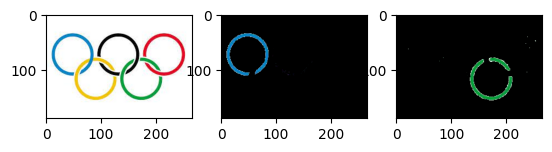

In [129]:
# 課題 2-6 code解答欄
import cv2
import numpy as np
import matplotlib.pyplot as plt

img=cv2.imread("lesson2-6-input-1.jpg")
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

lower_blue = np.array([90,64,0])
upper_blue = np.array([150,255,255])

lower_green = np.array([56, 25, 25])
upper_green = np.array([75, 255, 255])

mask_b = cv2.inRange(hsv, lower_blue, upper_blue)
res_b = cv2.bitwise_and(img_rgb,img_rgb, mask= mask_b)

mask_g = cv2.inRange(hsv, lower_green, upper_green)
res_g = cv2.bitwise_and(img_rgb,img_rgb, mask= mask_g)

plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.subplot(1, 3, 2)
plt.imshow(res_b)
plt.subplot(1, 3, 3)
plt.imshow(res_g)

res_b=cv2.cvtColor(res_b,cv2.COLOR_BGR2RGB)
res_g=cv2.cvtColor(res_g,cv2.COLOR_BGR2RGB)

cv2.imwrite("lesson2-6-1.png",res_b)
cv2.imwrite("lesson2-6-2.png",res_g)

## 画像の幾何変換
参考サイト: [OpenCV-Pythonチュートリアル » OpenCVを使った画像処理 » 画像の幾何変換](http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html#geometric-transformations)

OpenCVでは幾つかのクラスの画像の座標変換による変形をサポートしている。これを実例で試してみよ。それぞれどういう式で表現されるのか理解しておくことは重要である。

### 課題 2-7
配布しているzipファイル内の画像とは異なる画像を用意し、
それに対してチュートリアルにある4つの変換（スケーリング、並進、回転、アフィン変換）のそれぞれをチュートリアルとは異なるパラメータ（変換を決める変数の数値）を使って変形させ、表示せよ。
変換前の画像と変換後の画像群を並べて表示すること。

プログラムコードだけでなく元となった画像と生成結果の画像もファイルとして提出すること。
元画像のファイル名は `lesson2-7-input.png`
（JPEGファイルであれば `lesson2-7-input.jpg` など）とし、
結果のファイル名は `lesson2-7-scaling.png`,
`lesson2-7-translation.png`,
`lesson2-7-rotation.png`,
`lesson2-7-affine.png` とすること。


True

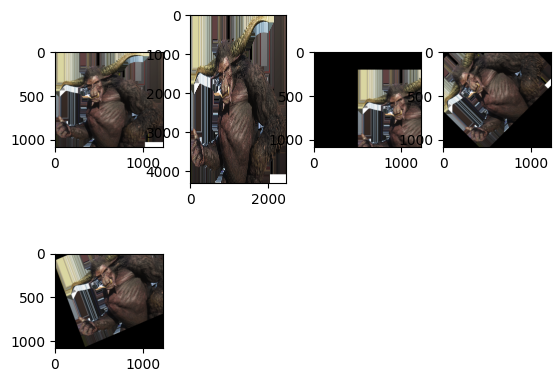

In [57]:
# 課題 2-7 code解答欄
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('lesson2-7-input.png')
#拡大
height, width = img.shape[:2]
res1 = cv2.resize(img,(2*width, 4*height), interpolation = cv2.INTER_LINEAR)

#並進
#img = cv2.imread('messi5.jpg',0)
rows,cols = img.shape[:2]
M = np.float32([[1,0,500],[0,1,200]])
res2 = cv2.warpAffine(img,M,(cols,rows))

#回転
N = cv2.getRotationMatrix2D((cols/4,rows/2),45,1)
res3 = cv2.warpAffine(img,N,(cols,rows))

#アフィン変換
pts1 = np.float32([[20,20],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
O = cv2.getAffineTransform(pts1,pts2)
res4 = cv2.warpAffine(img,O,(cols,rows))



plt.subplot(2, 4, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(2, 4, 2)
plt.imshow(cv2.cvtColor(res1, cv2.COLOR_BGR2RGB))
plt.subplot(2, 4, 3)
plt.imshow(cv2.cvtColor(res2, cv2.COLOR_BGR2RGB))
plt.subplot(2, 4, 4)
plt.imshow(cv2.cvtColor(res3, cv2.COLOR_BGR2RGB))
plt.subplot(2, 4, 5)
plt.imshow(cv2.cvtColor(res4, cv2.COLOR_BGR2RGB))


cv2.imwrite("lesson2-7-scaling.png",res1)
cv2.imwrite("lesson2-7-translation.png",res2)
cv2.imwrite("lesson2-7-rotation.png",res3)
cv2.imwrite("lesson2-7-affine.png",res4)

### 課題 2-8
射影変換の課題は台形補正とよばれる技術の基礎である。
配布しているzipファイル内の画像とは異なる画像で、
視野内の長方形が歪んで台形のように写っている画像を用意し、
それが画像上で長方形となるように射影変換を適用して
変換前後の画像を表示、保存せよ。

変換前の元画像はダウンロードしたり自分で撮影したりして
用意すること。
適切な変換パラメータの計算は `cv2.getPerspectiveTransform` を
使って計算できる。

プログラムコードだけでなく元となった画像と生成結果の画像も
ファイルとして提出すること。
元画像のファイル名は `lesson2-8-input.png`
（JPEGファイルであれば `lesson2-8-input.jpg` など）とし、
結果のファイル名は `lesson2-8.png` とすること。

> **ヒント**
>
>下記の実行結果例の2例目では https://github.com/opencv/opencv/tree/master/samples/data の sudoku.png を利用している。

True

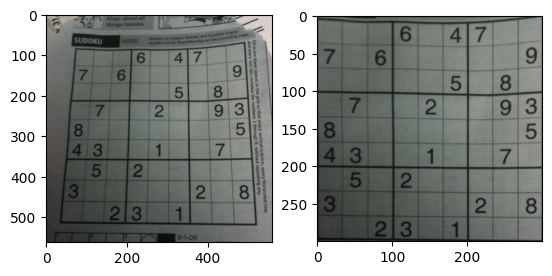

In [85]:
# 課題 2-8 code解答欄
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('lesson2-8-input.png')
rows,cols,ch = img.shape

pts1 = np.float32([[75,80],[490,70],[35,520],[520,520]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(300,300))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(dst)
cv2.imwrite("lesson2-8.png",dst)


## 閾値処理（二値化）
参考サイト: [OpenCV-Pythonチュートリアル » OpenCVを使った画像処理 » 画像のしきい値処理](http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html)
- [参考2](http://demo.ipol.im/demo/158/)
- [参考3](http://amroamroamro.github.io/mexopencv/opencv/thresholding_demo.html)


閾値（しきいち）処理（＝二値化処理）を実装してみよう。
使用する関数 `cv2.threshold()` の引数についての説明はチュートリアルに記載されている。
閾値処理には様々な方法があり、関数にあたえる引数の種類（ `THRESH_BINARY` など）によって処理の内容がかわる。

### 課題 2-9
`cv2.threshold()` 関数をつかって
さまざまな二値化処理を実装せよ。

チュートリアルとも配布しているzipファイル内の画像とも
異なる画像を用意し、それを
濃淡画像に変換した上で二値化処理した結果を並べて表示せよ。
閾値を変化させると同じ画像でも結果が変わるので、同じ入力画像に対して閾値を変えた複数の例を表示せよ。
2種類以上の方法について、それぞれ複数の閾値を使って画像を生成し、元の画像と並べて表示すること。

プログラムコードだけでなく元となった画像と生成結果の画像も
ファイルとして提出すること。
元画像のファイル名は `lesson2-9-input.png`
（JPEGファイルであれば `lesson2-9-input.jpg` など）とし、
結果のファイル名は `lesson2-9-1.png`,
`lesson2-9-2.png`, ... とすること。

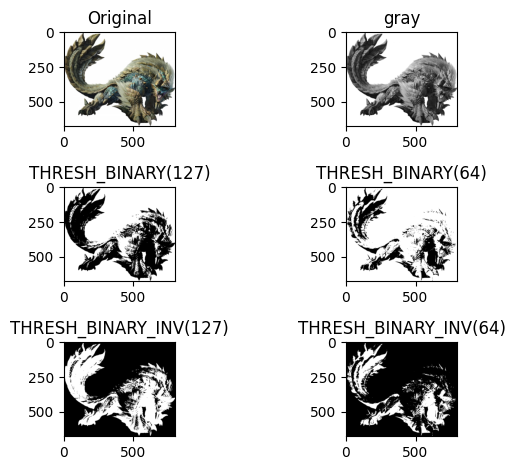

True

In [108]:
# 課題 2-9 code解答欄
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_bgr = cv2.imread('lesson2-9-input.jpg')
img_rgb=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
img = cv2.imread('lesson2-9-input.jpg',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh1_1 = cv2.threshold(img,64,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh2_2 = cv2.threshold(img,64,255,cv2.THRESH_BINARY_INV)


titles = ['Original','gray','THRESH_BINARY(127)','THRESH_BINARY(64)','THRESH_BINARY_INV(127)','THRESH_BINARY_INV(64)']
images = [img_rgb,img, thresh1,thresh1_1, thresh2,thresh2_2]


for i in range(6):
    plt.subplot(3,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])

plt.tight_layout()
plt.show()

cv2.cvtColor(images[0],cv2.COLOR_BGR2RGB)
cv2.imwrite("lesson2-9-1.png",images[0])
cv2.imwrite("lesson2-9-2.png",images[1])
cv2.imwrite("lesson2-9-3.png",images[2])
cv2.imwrite("lesson2-9-4.png",images[3])
cv2.imwrite("lesson2-9-5.png",images[4])
cv2.imwrite("lesson2-9-6.png",images[5])

### 課題 2-10
課題 2-9のプログラムを改良して、
チュートリアルにある大津のアルゴリズムを
つかって閾値を自動計算して二値化するように
せよ。

プログラムコードだけでなく元となった画像と生成結果の画像も
ファイルとして提出すること。
元画像のファイル名は `lesson2-10-input.png`
（JPEGファイルであれば `lesson2-10-input.jpg` など）とし、
結果のファイル名は `lesson2-10.png` とすること。

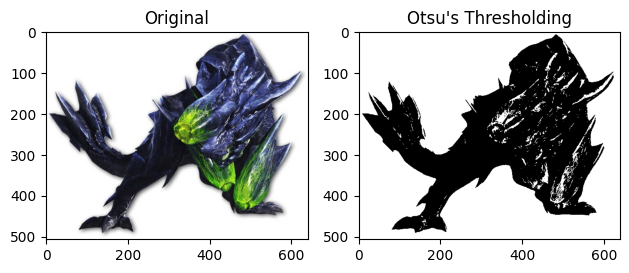

True

In [119]:
# 課題 2-10 code解答欄
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_bgr = cv2.imread('lesson2-10-input.jpg')
img_rgb=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
img = cv2.imread('lesson2-10-input.jpg',0)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images
images = [img_rgb,th2]
titles = ['Original',"Otsu's Thresholding"]

for i in range(2):
    plt.subplot(1,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])

plt.tight_layout()
plt.show()

cv2.imwrite("lesson2-10.png",images[1])
